<a href="https://colab.research.google.com/github/bhavin250495/Tensorflow2.0-Tutorial/blob/master/TransferLearningTF2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget 'https://storage.googleapis.com/kaggle-data-sets/207554/454322/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1585395253&Signature=Vqj72E%2FUHzkP1Q02I2mgJVygBKtsn6wwoFYKXqhlbx3DKctKFgmqiDRLFdyKKFrFtnFQ3VVW6r8BrjkSjRCGeQJWik0QWvYkkBG4JVuGdjGRqdKsyDbDgejury2yXMX5QMDTU6TcEQc9Wi0pMv%2FLM%2FcQUL0JjPYViY6I%2BdzSdxTRO6MLnRngTlrIzYSkvjZQ8LmR34Me1niBuqrVwBp0sdMyHMEp87OQISrQZ5EH5UL31sCfT6MaNNWoNFALCb0py3qSaGzAEKEhYnye9NNOeFzUVbm0wfn2ZLgUsJZCvl8TgNF8p7yXOZdUKPaFPFq5lLNXEIPyzD4wdYXE%2F%2FtO2w%3D%3D&response-content-disposition=attachment%3B+filename%3Dfood5k.zip'
 

The name is too long, 518 chars total.
Trying to shorten...
New name is archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1585395253&Signature=Vqj72E%2FUHzkP1Q02I2mgJVygBKtsn6wwoFYKXqhlbx3DKctKFgmqiDRLFdyKKFrFtnFQ3VVW6r8BrjkSjRCGeQJWik0QWvYkkBG4JVuGdjGRqdKsyDbDgejury2yXMX5QMD.
--2020-03-28 07:41:16--  https://storage.googleapis.com/kaggle-data-sets/207554/454322/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1585395253&Signature=Vqj72E%2FUHzkP1Q02I2mgJVygBKtsn6wwoFYKXqhlbx3DKctKFgmqiDRLFdyKKFrFtnFQ3VVW6r8BrjkSjRCGeQJWik0QWvYkkBG4JVuGdjGRqdKsyDbDgejury2yXMX5QMDTU6TcEQc9Wi0pMv%2FLM%2FcQUL0JjPYViY6I%2BdzSdxTRO6MLnRngTlrIzYSkvjZQ8LmR34Me1niBuqrVwBp0sdMyHMEp87OQISrQZ5EH5UL31sCfT6MaNNWoNFALCb0py3qSaGzAEKEhYnye9NNOeFzUVbm0wfn2ZLgUsJZCvl8TgNF8p7yXOZdUKPaFPFq5lLNXEIPyzD4wdYXE%2F%2FtO2w%3D%3D&response-content-disposition=attachment%3B+filename%3Dfood5k.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.21

In [0]:
!unzip 'archive.zip'

In [0]:
!mkdir train
!mkdir test
!mkdir train/nonfood
!mkdir train/food
!mkdir test/nonfood
!mkdir test/food

In [0]:
!mv Food-5K/training/0*.jpg train/nonfood
!mv Food-5K/training/1*.jpg train/food

!mv Food-5K/validation/0*.jpg test/nonfood
!mv Food-5K/validation/1*.jpg test/food


In [0]:
!pip install tensorflow==2.1

In [6]:
import tensorflow as tf
tf.__version__

'2.2.0-rc1'

In [0]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Input,Dense
import numpy as np



In [0]:
import glob
IMAGE_SIZE = [200,200]
image_files = glob.glob('train'+'/*/*.jpg')
valid_files = glob.glob('test'+'/*/*.jpg')
folders = glob.glob('train'+'/*')


In [21]:
#Load trained model without input
ptm = VGG16(input_shape = IMAGE_SIZE + [3] , weights = 'imagenet', include_top = False)
ptm.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [0]:
#Freeze model weights 
ptm.trainable = False


In [23]:

x = ptm.output
x = Flatten()(x)
op = Dense(2,activation = 'softmax')(x)
model = Model(ptm.input,op)
# model.complile(loss = 'categorical_crossentropy',optimizer='adam')
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0   

In [0]:
gen = image.ImageDataGenerator(preprocessing_function=preprocess_input,
                               rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range = 0.1,
                               shear_range = 0.1,
                               zoom_range = 0.2,
                               horizontal_flip = True)

In [25]:

batch_size = 128

train  = gen.flow_from_directory('train',shuffle=True,target_size=IMAGE_SIZE,batch_size=batch_size)
test = gen.flow_from_directory('test',shuffle=True,target_size=IMAGE_SIZE,batch_size=batch_size)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['acc']
)

In [27]:
r = model.fit_generator(train,
                        validation_data = test,
                        epochs = 5,
                        steps_per_epoch = int(np.ceil(len(image_files)/batch_size)),
                        validation_steps = int(np.ceil(len(valid_files)/batch_size)))

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7f9d5a072840>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7f9d5a072840>. 

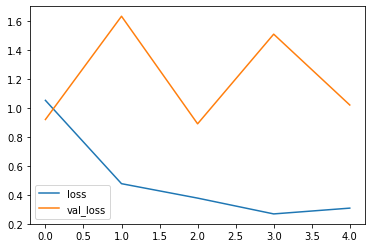

In [28]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

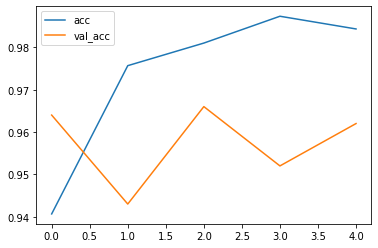

In [30]:
plt.plot(r.history['acc'],label = 'acc')
plt.plot(r.history['val_acc'],label = 'val_acc')
plt.legend()

In [0]:
model.evaluate_generator(test)

Instructions for updating:
Please use Model.evaluate, which supports generators.
